## Markdown

In [3]:
%matplotlib inline

# Imports
import igraph
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import pandas
import seaborn

# Set plotting styles
seaborn.set_style("whitegrid")

In [6]:
# Import data, label, and augment with year
edges = pandas.read_csv("../data/supreme-court-edges.csv", sep=" ", header=None)
edges.columns = ["cited", "citing"]
edges.loc[:, "year"] = edges.loc[:, "citing"].astype(str).apply(lambda x: int(x[0:4]))

In [7]:
# Get unique node set
node_set = set()
node_set.update(edges.loc[:,  "cited"])
node_set.update(edges.loc[:,  "citing"])
node_list  = sorted(list(node_set))
node_map = dict(zip(node_list, range(len(node_list))))

In [9]:
# Add node IDs to dataframe
edges.loc[:, "cited_id"] = edges.loc[:, "cited"].apply(lambda x: node_map[x])
edges.loc[:, "citing_id"] = edges.loc[:, "citing"].apply(lambda x: node_map[x])

In [12]:
# Build longitudinal igraph.Graph objects
year_list = range(1805, 1836)
graph_list = []
giant_percent = []

# Iterate through years
for year in year_list:
    # Subset edge list and create undirected object 
    edge_list = edges.loc[edges.loc[:, "year"] <= year, :]\
        .loc[:, ["cited_id", "citing_id"]].values.tolist()
    g = igraph.Graph(edge_list, directed=False)
    graph_list.append(g)
    
    # Calculate the giant component percent
    g_giant = g.components().giant()
    giant_percent.append((year, 
                         float(g_giant.vcount()) / g.vcount()))

# Create dataframe for giant component size
giant_df = pandas.DataFrame(giant_percent, columns=["year", "percent"])
giant_df.head()

,year,percent
0,1805,0.100000
1,1806,0.076923
2,1807,0.160494
3,1808,0.149425
4,1809,0.130000


In [14]:
# Calculate layout from terminal graph and re-scale
layout = graph_list[-1].layout_fruchterman_reingold(maxiter=1000)
coord_df = pandas.DataFrame(layout.coords, columns=["x", "y"])
coord_df.loc[:, "xs"] = (coord_df["x"] - coord_df["x"].min()) / (coord_df["x"].max() - coord_df["x"].min())
coord_df.loc[:, "ys"] = (coord_df["y"] - coord_df["y"].min()) / (coord_df["y"].max() - coord_df["y"].min())
coord_df.head()

,x,y,xs,ys
0,-104.621167,683.147957,0.563537,0.875160
1,-168.391525,-403.193836,0.518744,0.114643
2,-156.073561,-324.349148,0.527396,0.169840
3,-466.038948,764.228077,0.309674,0.931922
4,-305.412046,98.921737,0.422500,0.466160


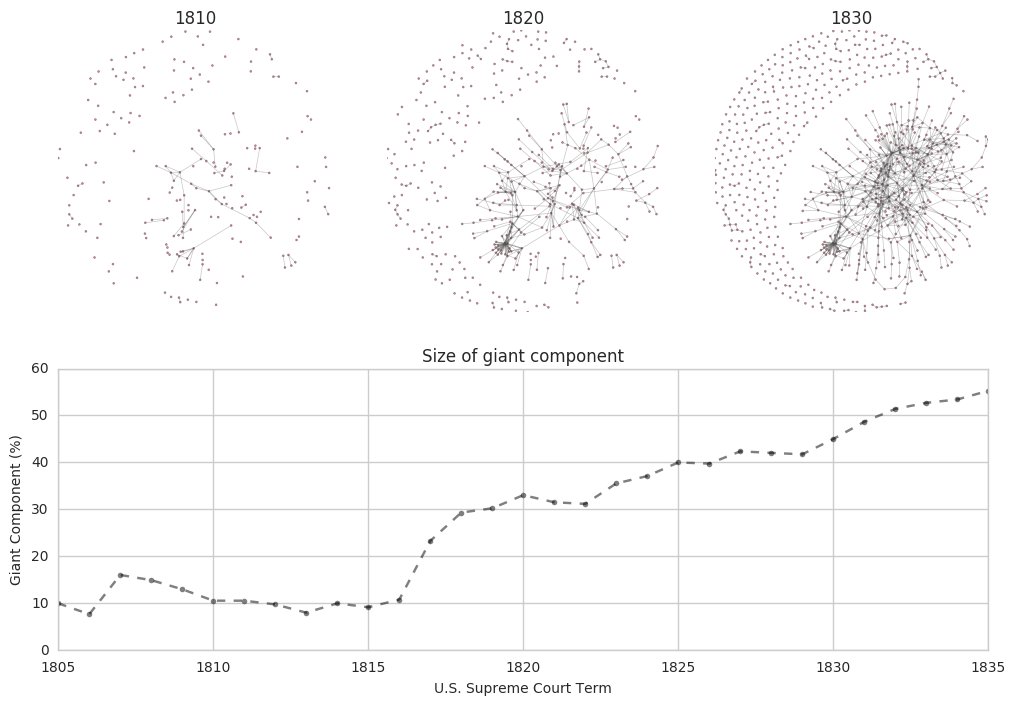

In [15]:
# Setup figure
plt.Figure()
f = plt.gcf()
f.set_size_inches(12, 8)

# Create first network in upper left
ax2 = plt.subplot2grid((2,3), (0,0), colspan=1)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.axis('off')
plt.title("1810", fontsize=12, family="Bitstream Vera Sans")

lc = []
for e in graph_list[10].es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

ax2.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.33, linewidths=0.5))

for i, v in enumerate(graph_list[10].vs):
    ax2.add_artist(plt.Circle((coord_df.loc[i, "xs"],
                              coord_df.loc[i, "ys"]),
                              radius=0.0033, edgecolor='#343434', facecolor='#dc143c', linewidth=0.5, alpha=0.5))


# Create second network in upper middle
ax3 = plt.subplot2grid((2,3), (0,1), colspan=1)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.axis("off")
plt.title("1820", fontsize=12, family="Bitstream Vera Sans")

lc = []
for e in graph_list[20].es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

ax3.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.33, linewidths=0.5))

for i, v in enumerate(graph_list[20].vs):
    ax3.add_artist(plt.Circle((coord_df.loc[i, "xs"],
                              coord_df.loc[i, "ys"]),
                              radius=0.0033, edgecolor='#343434', facecolor='#dc143c', linewidth=0.5, alpha=0.5))

# Create third network in upper right
ax4 = plt.subplot2grid((2,3), (0,2), colspan=1)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax4.axis("off")
plt.title("1830", fontsize=12, family="Bitstream Vera Sans")

lc = []
for e in graph_list[30].es:
    lc.append([(coord_df.loc[e.source, "xs"], coord_df.loc[e.source, "ys"]),
               (coord_df.loc[e.target, "xs"], coord_df.loc[e.target, "ys"])])

ax4.add_collection(mc.LineCollection(lc, color="#545454", alpha=0.33, linewidths=0.5))

for i, v in enumerate(graph_list[30].vs):
    ax4.add_artist(plt.Circle((coord_df.loc[i, "xs"],
                              coord_df.loc[i, "ys"]),
                              radius=0.0033, edgecolor='#343434', facecolor='#dc143c', linewidth=0.5, alpha=0.5))

# Create bottom line plot
ax1 = plt.subplot2grid((2,3), (1,0), colspan=3)
ax1.plot(giant_df.year, giant_df.percent * 100.0, color="black", linestyle="--", marker="o", markersize=4, alpha=0.5)
ax1.set_xticklabels([1805, 1810, 1815, 1820, 1825, 1830, 1835], family="Bitstream Vera Sans")
ax1.set_ylim([0, 60])
ax1.set_yticklabels([0, 10, 20, 30, 40, 50, 60], family="Bitstream Vera Sans")
plt.xlabel("U.S. Supreme Court Term", fontsize=10, family="Bitstream Vera Sans")
plt.ylabel("Giant Component (%)", fontsize=10, family="Bitstream Vera Sans")
plt.title("Size of giant component", fontsize=12, family="Bitstream Vera Sans")

plt.savefig("../figures/scotus_citation_phase_transition.png", figsize=(12, 8), dpi=400)
plt.savefig("../figures/scotus_citation_phase_transition.eps", figsize=(12, 8), dpi=400)
plt.savefig("../figures/scotus_citation_phase_transition.pdf", figsize=(12, 8), dpi=400)